Course: DSCI 799
Student: Ian Effendi (iae2784@rit.edu)

# Data Profile

> This notebook is used to perform the data profiling on the NFT marektplace dataset.

In [1]:
# Import python for processing the data.
import pandas as pd
import numpy as np
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Settings
URI = "../data/ext/Data_API.csv.gz"
chunksize = 40000
dtypes = {
    'Smart_contract': "",
    'ID_token': "",
    'Transaction_hash': "",
    'Seller_address': "",
    'Seller_username': "",
    'Buyer_address': "",
    'Buyer_username': "",
    'Image_url_1': "",
    'Image_url_2': "",
    'Image_url_3': "",
    'Image_url_4': "",
    'Price_Crypto': "",
    'Crypto': "",
    'Price_USD': "",
    'Name': "",
    'Description': "",
    'Collection': "",
    'Market': "",
    'Datetime_updated': "",
    'Datetime_updated_seconds': "",
    'Permanent_link': "",
    'Unique_id_collection': "",
    'Collection_cleaned': "",
    'Category': ""    
}

In [3]:
time header = pd.read_csv(URI, compression="gzip", nrows=1)

CPU times: user 2.07 ms, sys: 12.2 ms, total: 14.2 ms
Wall time: 15.8 ms


In [4]:
header

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games


In [5]:
list(header.columns)

['Smart_contract',
 'ID_token',
 'Transaction_hash',
 'Seller_address',
 'Seller_username',
 'Buyer_address',
 'Buyer_username',
 'Image_url_1',
 'Image_url_2',
 'Image_url_3',
 'Image_url_4',
 'Price_Crypto',
 'Crypto',
 'Price_USD',
 'Name',
 'Description',
 'Collection',
 'Market',
 'Datetime_updated',
 'Datetime_updated_seconds',
 'Permanent_link',
 'Unique_id_collection',
 'Collection_cleaned',
 'Category']

In [6]:
lines = 0
cols = list(dtypes.keys())
for df_chunk in tqdm(pd.read_csv(URI, usecols=cols, chunksize=chunksize, low_memory=False)):
    lines = lines + df_chunk.shape[0]
print(f'Found {lines} row(s) of data.');

152it [00:52,  2.91it/s]

Found 6071027 row(s) of data.


In [7]:
df_list = []
lines = 0
for df_chunk in tqdm(pd.read_csv(URI, usecols=cols, chunksize=chunksize, low_memory=False)):
    lines = lines + df_chunk.shape[0];
    df_list.append(df_chunk);
del df_chunk
X = pd.concat(df_list);
del df_list    
print(f'Found {lines} row(s) of data.')

152it [00:51,  2.95it/s]


Found 6071027 row(s) of data.


In [8]:
print(X['Category'].min())
print(X['Category'].max())
print(X['Category'].unique())
print(X['Category'].describe())

Art
Utility
['Games' 'Art' 'Other' 'Collectible' 'Metaverse' 'Utility']
count     6071027
unique          6
top         Games
freq      2643014
Name: Category, dtype: object


In [53]:
print(X['Collection_cleaned'].unique())
print(X['Collection_cleaned'].describe())

['Godsunchained' 'Cryptokittie' 'Oghodlergang' ... 'Cryptobullrun'
 'Szabotage' 'Ataricapsulecollection']
count     6071027
unique       4624
top         Alien
freq      1290146
Name: Collection_cleaned, dtype: object


In [54]:
print(X['Market'].unique())
print(X['Market'].describe())

['Godsunchained' 'Cryptokitties' 'Atomic' 'Decentraland' 'OpenSea']
count     6071027
unique          5
top        Atomic
freq      3185292
Name: Market, dtype: object


In [9]:
print(X['Datetime_updated'].min())
print(X['Datetime_updated'].max())
print(X['Datetime_updated'].describe())

2017-11-23 00:00:00
2021-04-27 00:00:00
count                 6071027
unique                   1252
top       2021-04-27 00:00:00
freq                   154445
Name: Datetime_updated, dtype: object


In [10]:
# print(X['ID_token'].min())
print(X['ID_token'].describe())
print(X['ID_token'].count())

count     6071027
unique    4747954
top             0
freq         8206
Name: ID_token, dtype: object
6071027


In [11]:
list(X.columns)

['Smart_contract',
 'ID_token',
 'Transaction_hash',
 'Seller_address',
 'Seller_username',
 'Buyer_address',
 'Buyer_username',
 'Image_url_1',
 'Image_url_2',
 'Image_url_3',
 'Image_url_4',
 'Price_Crypto',
 'Crypto',
 'Price_USD',
 'Name',
 'Description',
 'Collection',
 'Market',
 'Datetime_updated',
 'Datetime_updated_seconds',
 'Permanent_link',
 'Unique_id_collection',
 'Collection_cleaned',
 'Category']

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071027 entries, 0 to 6071026
Data columns (total 24 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Smart_contract            object 
 1   ID_token                  object 
 2   Transaction_hash          object 
 3   Seller_address            object 
 4   Seller_username           object 
 5   Buyer_address             object 
 6   Buyer_username            object 
 7   Image_url_1               object 
 8   Image_url_2               object 
 9   Image_url_3               object 
 10  Image_url_4               object 
 11  Price_Crypto              float64
 12  Crypto                    object 
 13  Price_USD                 float64
 14  Name                      object 
 15  Description               object 
 16  Collection                object 
 17  Market                    object 
 18  Datetime_updated          object 
 19  Datetime_updated_seconds  object 
 20  Permanent_link          

In [13]:
for col in tqdm(X.columns):
    print(X[col].describe())

  4%|▍         | 1/24 [00:00<00:07,  3.11it/s]

count          5109417
unique            1895
top       atomicassets
freq           3185292
Name: Smart_contract, dtype: object


  8%|▊         | 2/24 [00:05<01:10,  3.19s/it]

count     6071027
unique    4747954
top             0
freq         8206
Name: ID_token, dtype: object


 12%|█▎        | 3/24 [00:07<00:58,  2.76s/it]

count                                               2885387
unique                                              2180960
top       0xd037bb2c6d635f36a4e7a0a771d9dfebeb97ddcaf921...
freq                                                     36
Name: Transaction_hash, dtype: object


 17%|█▋        | 4/24 [00:08<00:38,  1.93s/it]

count                                        6071027
unique                                        312920
top       0x76481caa104b5f6bccb540dae4cefaf1c398ebea
freq                                          192586
Name: Seller_address, dtype: object


 21%|██        | 5/24 [00:08<00:25,  1.33s/it]

count      1093254
unique       34488
top       0x4FabDA
freq         24294
Name: Seller_username, dtype: object


 25%|██▌       | 6/24 [00:09<00:19,  1.10s/it]

count                                        6071027
unique                                        358348
top       0x76481caa104b5f6bccb540dae4cefaf1c398ebea
freq                                          130231
Name: Buyer_address, dtype: object


 29%|██▉       | 7/24 [00:09<00:14,  1.20it/s]

count          892863
unique          59068
top       StrongHands
freq            29469
Name: Buyer_username, dtype: object


 33%|███▎      | 8/24 [00:11<00:20,  1.26s/it]

count                                            6016229
unique                                           1602953
top       QmYm1FG7LxhF3mFUaVmVEVqRztEmByVbHwL6ZWXwVY2dvb
freq                                              306327
Name: Image_url_1, dtype: object


 38%|███▊      | 9/24 [00:13<00:19,  1.30s/it]

count                                               4949005
unique                                              1186551
top       https://ipfs.io/ipfs/QmYm1FG7LxhF3mFUaVmVEVqRz...
freq                                                 306327
Name: Image_url_2, dtype: object


 42%|████▏     | 10/24 [00:14<00:18,  1.29s/it]

count                                               5038697
unique                                               995183
top       https://ipfs.atomichub.io/ipfs/QmYm1FG7LxhF3mF...
freq                                                 306327
Name: Image_url_3, dtype: object


 50%|█████     | 12/24 [00:15<00:11,  1.06it/s]

count                                               5034085
unique                                               990833
top       https://wax.atomichub.io/ipfs/QmYm1FG7LxhF3mFU...
freq                                                 306327
Name: Image_url_4, dtype: object
count    6.071027e+06
mean     6.574200e+02
std      1.217706e+06
min      0.000000e+00
25%      2.400000e-02
50%      4.100000e-01
75%      5.000000e+00
max      3.000000e+09
Name: Price_Crypto, dtype: float64


 58%|█████▊    | 14/24 [00:16<00:05,  1.73it/s]

count     6071027
unique        160
top           WAX
freq      3185292
Name: Crypto, dtype: object
count    6.062744e+06
mean     1.463413e+02
std      5.488389e+03
min      1.514250e-16
25%      2.277600e-01
50%      1.426470e+00
75%      1.385100e+01
max      7.501893e+06
Name: Price_USD, dtype: float64


 62%|██████▎   | 15/24 [00:17<00:06,  1.36it/s]

count          1851964
unique         1219345
top       NFT Yourself
freq              5337
Name: Name, dtype: object


 67%|██████▋   | 16/24 [00:18<00:05,  1.44it/s]

count                                               1730729
unique                                               489235
top       Rare Player Cards are only issued at 100 editi...
freq                                                 275588
Name: Description, dtype: object


 71%|███████   | 17/24 [00:18<00:04,  1.73it/s]

count          6071027
unique            6283
top       alien.worlds
freq           1288810
Name: Collection, dtype: object


 75%|███████▌  | 18/24 [00:18<00:03,  1.95it/s]

count     6071027
unique          5
top        Atomic
freq      3185292
Name: Market, dtype: object


 79%|███████▉  | 19/24 [00:19<00:02,  2.16it/s]

count                 6071027
unique                   1252
top       2021-04-27 00:00:00
freq                   154445
Name: Datetime_updated, dtype: object


 83%|████████▎ | 20/24 [00:22<00:05,  1.41s/it]

count                 6071027
unique                4008050
top       2021-04-21 17:17:36
freq                       87
Name: Datetime_updated_seconds, dtype: object


 88%|████████▊ | 21/24 [00:24<00:04,  1.37s/it]

count                                               1907262
unique                                              1437009
top       https://opensea.io/assets/0x557430421f8f3ed0a9...
freq                                                   5151
Name: Permanent_link, dtype: object


 92%|█████████▏| 22/24 [00:28<00:04,  2.30s/it]

count                                6071027
unique                               4678242
top       ('Kings-of-leon-yellowheart', '0')
freq                                    5420
Name: Unique_id_collection, dtype: object


 96%|█████████▌| 23/24 [00:28<00:01,  1.72s/it]

count     6071027
unique       4624
top         Alien
freq      1290146
Name: Collection_cleaned, dtype: object


100%|██████████| 24/24 [00:29<00:00,  1.22s/it]

count     6071027
unique          6
top         Games
freq      2643014
Name: Category, dtype: object


In [14]:
X.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games


In [15]:
X.tail()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
6071022,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,16412,0x346561b3f7a233c4245f91c68940b2d750df26ef1b04...,0x9f37284b3a538be8eea2d401b595f44c96d39b70,NaN,0xa353401738e7ec6a4db9c0ee4c66eb5252f681c4,NaN,https://lh3.googleusercontent.com/isSUPEsJJWpF...,https://ipfs.pixura.io/ipfs/QmSHxximuHUZV54pAA...,https://lh3.googleusercontent.com/isSUPEsJJWpF...,...,Pájaro Doctor 13/40,Digital piece made by using a variety of softw...,Superrare,OpenSea,2021-04-01 00:00:00,2021-04-01 00:00:52,https://opensea.io/assets/0xb932a70a57673d89f4...,"('Superrare', '16412')",Superrare,Art
6071023,0x495f947276749ce646f68ac8c248420045cb7b5e,1062274196422536302774639391540663457511117433...,0xd507715bb835252a65d572037ac8eb36854b05ecc672...,0xeada96bf164643bdfe3e657a9f380854694a49dd,Mistcop,0xe2fe53f9bcb33e3e0fc65f2f627ca4eb8e958347,NaN,https://lh3.googleusercontent.com/qdzZDtYHHVdi...,NaN,https://lh3.googleusercontent.com/qdzZDtYHHVdi...,...,Kawaii Monster #2,NaN,Kawaii-monsters,OpenSea,2021-04-01 00:00:00,2021-04-01 00:00:50,https://opensea.io/assets/0x495f947276749ce646...,"('Kawaii-monsters', '1062274196422536302774639...",Kawaiimonster,Other
6071024,0x495f947276749ce646f68ac8c248420045cb7b5e,4602588071276327231659212203812866312085457052...,0x4cb90a775619a9483c003050de47c403fae957e5352b...,0x65c1b9ae4e4d8dcccfd3dc41b940840fe8570f2a,International_Megadigital,0x220d20310f52d97e353028ebd742d2c690eaf0a1,WanderlustNFT,https://lh3.googleusercontent.com/SoTAV8k4UC90...,NaN,https://lh3.googleusercontent.com/SoTAV8k4UC90...,...,Bishoujo Originals - #4977,The original source for collectible Bishoujo h...,Moe-tokens,OpenSea,2021-04-01 00:00:00,2021-04-01 00:00:51,https://opensea.io/assets/0x495f947276749ce646...,"('Moe-tokens', '460258807127632723165921220381...",Moetoken,Other
6071025,0x495f947276749ce646f68ac8c248420045cb7b5e,8060875342503467325201444233539848397816312727...,0x76068e84592753bb1e076c5320c7e3ecfe41e4da8ebe...,0xb236f00808a9f88b3117af95c881966288dfbcbb,TheOfficialGarrett,0xd543a0be0684f0556786586b83f4c9fd16a4dc35,kittylord,https://lh3.googleusercontent.com/AWwjq0cuTjHF...,NaN,https://lh3.googleusercontent.com/AWwjq0cuTjHF...,...,Smile 0066,Coming to you hot! Not Fun Tokens or (NFT's)!...,Not-fun-tokens,OpenSea,2021-04-01 00:00:00,2021-04-01 00:00:40,https://opensea.io/assets/0x495f947276749ce646...,"('Not-fun-tokens', '80608753425034673252014442...",Notfuntoken,Other
6071026,0x495f947276749ce646f68ac8c248420045cb7b5e,8060875342503467325201444233539848397816312727...,0x6efdcfde266760201767ba099c1f10f47937a8098720...,0xb236f00808a9f88b3117af95c881966288dfbcbb,TheOfficialGarrett,0xd543a0be0684f0556786586b83f4c9fd16a4dc35,kittylord,https://lh3.googleusercontent.com/1PSAAdTKWB5p...,NaN,https://lh3.googleusercontent.com/1PSAAdTKWB5p...,...,Smile 0023,Coming to you hot! Not Fun Tokens or (NFT's)!...,Not-fun-tokens,OpenSea,2021-04-01 00:00:00,2021-04-01 00:00:40,https://opensea.io/assets/0x495f947276749ce646...,"('Not-fun-tokens', '80608753425034673252014442...",Notfuntoken,Other


## Categories

In [16]:
# Groupby by country
categories = X.groupby("Category")

In [17]:
# Summary statistic of all countries
categories.describe().head()

Price_Crypto                                                   \
                   count          mean           std           min    25%   
Category                                                                    
Art            1472515.0      9.073167  4.943859e+02  0.000000e+00  0.005   
Collectible    1605657.0    189.678992  1.668442e+04  4.000000e-18  0.578   
Games          2643014.0     47.352587  2.598335e+03  0.000000e+00  0.042   
Metaverse        68372.0   5776.098898  1.160912e+05  3.960000e-07  0.490   
Other           272772.0  11559.110424  5.744339e+06  2.000000e-16  0.060   

                                                 Price_USD               \
                  50%         75%           max      count         mean   
Category                                                                  
Art          0.019566    0.128859  4.300000e+05  1470669.0   413.237412   
Collectible  4.500000   20.000000  9.000000e+06  1604886.0    68.438628   
Games        0.450000    2.400000  2.000000e+06  2641093.0    26.797056   
Metaverse    4.000000  300.000000  2.894062e+07    68160.0  1000.340103   
Other        0.890000    9.900000  3.000000e+09   269239.0    81.552627   

                                                                          \
                      std           min       25%        50%         75%   
Category                                                                   
Art          10582.695914  2.264600e-16  1.090125   5.662232   34.414774   
Collectible    706.913629  9.558400e-16  0.546300   2.090800   22.049829   
Games          842.789368  1.514250e-16  0.087723   0.350370    3.702300   
Metaverse    14740.808833  1.619323e-04  1.627800  54.295967  517.290088   
Other          571.256249  3.831500e-10  0.188800   1.914250   19.209325   

                           
                      max  
Category                   
Art          7.501893e+06  
Collectible  4.291656e+05  
Games        5.149742e+05  
Metaverse    2.684347e+06  
Other        9.984975e+04

In [18]:
categories.mean().sort_values(by="Price_USD",ascending=False)

,Price_Crypto,Price_USD
Category,,
Utility,24.822977,1005.444300
Metaverse,5776.098898,1000.340103
Art,9.073167,413.237412
Other,11559.110424,81.552627
Collectible,189.678992,68.438628
Games,47.352587,26.797056


array([[<AxesSubplot:title={'center':'Price_Crypto'}>,
        <AxesSubplot:title={'center':'Price_USD'}>]], dtype=object)

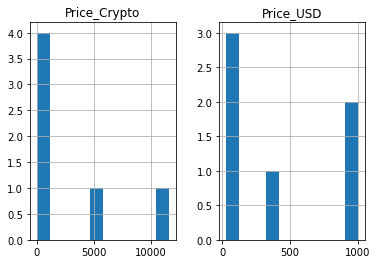

In [19]:
categories.mean().sort_values(by="Price_USD",ascending=False).hist()

In [20]:
categories.count()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned
Category,,,,,,,,,,,,,,,,,,,,,
Art,747115,1472515,1358545,1472515,368256,1472515,346480,1470651,718098,745257,...,1470669,586247,588520,1472515,1472515,1472515,1472515,633493,1472515,1472515
Collectible,1605657,1605657,380269,1605657,72712,1605657,69064,1572732,1566655,1572628,...,1604886,374222,362060,1605657,1605657,1605657,1605657,380269,1605657,1605657
Games,2406804,2643014,985516,2643014,522828,2643014,361485,2628321,2389527,2392304,...,2641093,747412,656882,2643014,2643014,2643014,2643014,749306,2643014,2643014
Metaverse,68372,68372,57894,68372,33759,68372,32253,67530,50088,51481,...,68160,40996,34032,68372,68372,68372,68372,41031,68372,68372
Other,272772,272772,94482,272772,88669,272772,77156,268303,218584,268335,...,269239,94426,80574,272772,272772,272772,272772,94482,272772,272772
Utility,8697,8697,8681,8697,7030,8697,6425,8692,6053,8692,...,8697,8661,8661,8697,8697,8697,8697,8681,8697,8697


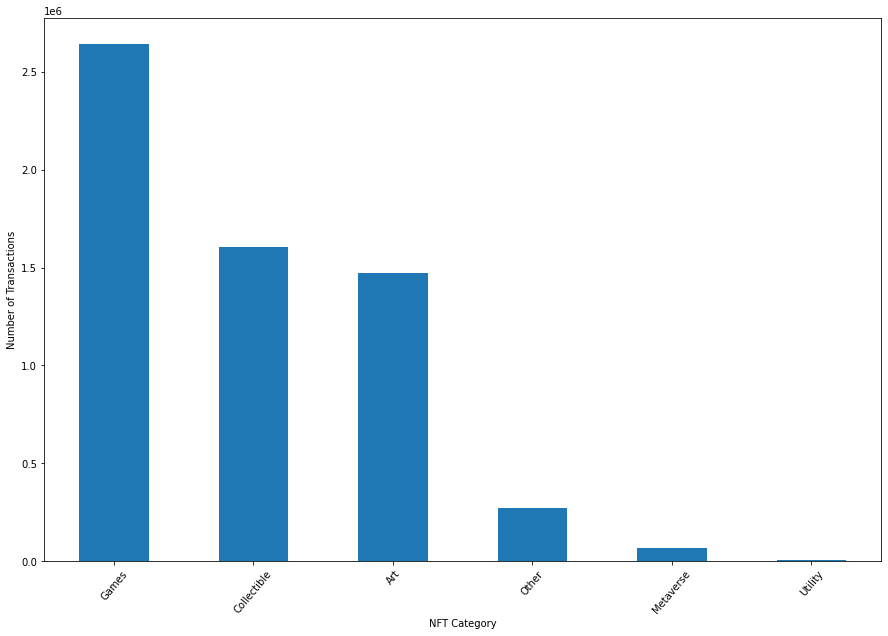

In [21]:
fig = plt.figure(figsize=(15,10))
categories.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("NFT Category")
plt.ylabel("Number of Transactions")
plt.savefig('../figures/01-category-sales.jpg', bbox_inches='tight', dpi=150)
plt.show()

In [22]:
list(categories.groups.keys())

['Art', 'Collectible', 'Games', 'Metaverse', 'Other', 'Utility']

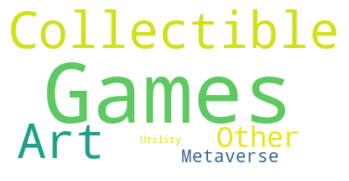

In [23]:
# Show wordcloud for NFT categories.
text = X['Category'].value_counts().to_dict()
wc = WordCloud(max_font_size=100, background_color="white").generate_from_frequencies(text)

# Save file.
wc.to_file("../figures/01-category-cloud.png")

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Markets

In [24]:
# Groupby by market
market = X.groupby("Market")

# Summary statistic of all marktes
market.describe().head()

Price_Crypto                                            \
                     count          mean           std           min   
Market                                                                 
Atomic           3185292.0     85.648723  1.784508e+03  1.000000e-08   
Cryptokitties     725400.0      0.087890  1.499275e+00  1.000000e-18   
Decentraland       16863.0  14003.936488  5.060384e+04  1.000000e+00   
Godsunchained     236210.0      0.039006  2.593025e-01  1.000000e-18   
OpenSea          1907262.0   1825.746422  2.172536e+06  0.000000e+00   

                                                                 Price_USD  \
                    25%         50%           75%           max      count   
Market                                                                       
Atomic          0.60000    3.980000     20.000000  1.500000e+06  3185292.0   
Cryptokitties   0.00454    0.010000      0.044336  6.000000e+02   725052.0   
Decentraland   59.00000  850.000000  13800.000000  2.772000e+06    16863.0   
Godsunchained   0.00090    0.002500      0.023000  2.700000e+01   236210.0   
OpenSea         0.00500    0.032989      0.125000  3.000000e+09  1899327.0   

                                                                            \
                      mean          std           min       25%        50%   
Market                                                                       
Atomic           10.802309   172.903316  3.680000e-10  0.105780   0.515150   
Cryptokitties    43.360742   735.493245  8.477850e-16  1.313813   5.508609   
Decentraland   1393.293620  6521.464164  2.042500e-02  2.295100  56.751500   
Godsunchained     8.947059   147.472215  1.514250e-16  0.129609   0.385574   
OpenSea         418.976851  9766.779771  2.264600e-16  1.146930  13.720350   

                                         
                      75%           max  
Market                                   
Atomic           2.381438  9.006872e+04  
Cryptokitties   20.076020  1.735590e+05  
Decentraland   927.491250  2.963550e+05  
Godsunchained    3.592800  2.250568e+04  
OpenSea         85.229095  7.501893e+06

In [25]:
market.mean().sort_values(by="Price_USD",ascending=False)

,Price_Crypto,Price_USD
Market,,
Decentraland,14003.936488,1393.293620
OpenSea,1825.746422,418.976851
Cryptokitties,0.087890,43.360742
Atomic,85.648723,10.802309
Godsunchained,0.039006,8.947059


array([[<AxesSubplot:title={'center':'Price_Crypto'}>,
        <AxesSubplot:title={'center':'Price_USD'}>]], dtype=object)

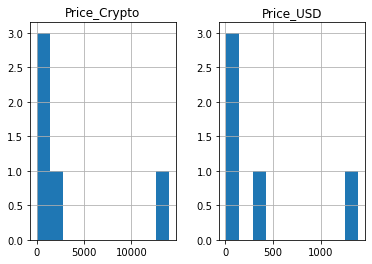

In [26]:
market.mean().sort_values(by="Price_USD",ascending=False).hist()

In [27]:
market.median().sort_values(by="Price_USD",ascending=False)

,Price_Crypto,Price_USD
Market,,
Decentraland,850.000000,56.751500
OpenSea,0.032989,13.720350
Cryptokitties,0.010000,5.508609
Atomic,3.980000,0.515150
Godsunchained,0.002500,0.385574


array([[<AxesSubplot:title={'center':'Price_Crypto'}>,
        <AxesSubplot:title={'center':'Price_USD'}>]], dtype=object)

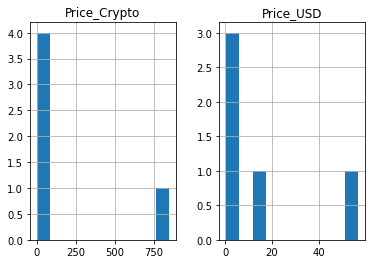

In [28]:
market.median().sort_values(by="Price_USD",ascending=False).hist()

<AxesSubplot:xlabel='Market'>

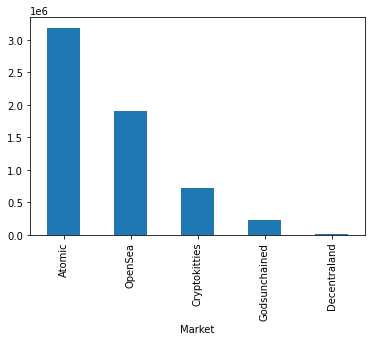

In [29]:
ax = market['Category'].count().sort_values(ascending=False).plot.bar()
ax.figure.savefig('../figures/02-market-freq.jpg', bbox_inches='tight', dpi=300)
ax

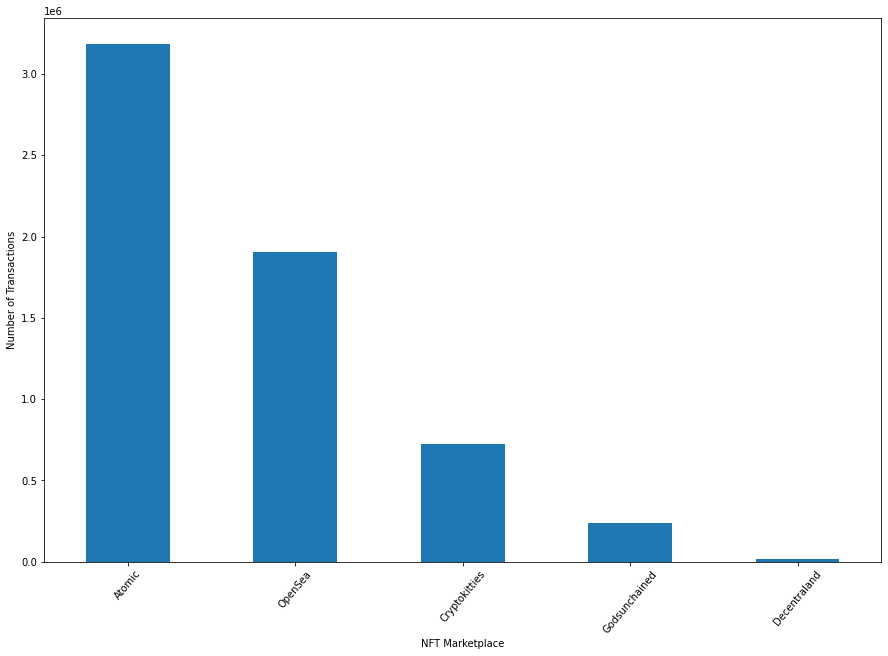

In [30]:
fig = plt.figure(figsize=(15,10))
market.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("NFT Marketplace")
plt.ylabel("Number of Transactions")
plt.savefig('../figures/02-market-sales.jpg', bbox_inches='tight', dpi=150)
plt.show()

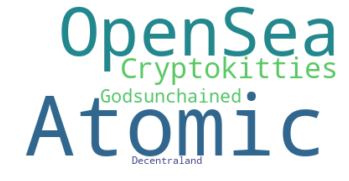

In [31]:
# Show wordcloud for NFT categories.
text = X['Market'].value_counts().to_dict()
wc = WordCloud(max_font_size=100, background_color="white").generate_from_frequencies(text)

# Save file.
wc.to_file("../figures/02-market-cloud.png")

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## NFT Collections

In [32]:
# Groupby
collections = X.groupby("Collection_cleaned")

# Summary statistics
collections.describe().head()

Price_Crypto                               \
                                  count      mean        std     min   
Collection_cleaned                                                     
Aaronsartistry                     57.0  0.055439   0.043263  0.0200   
Aasgard                            10.0  6.012350  12.642603  0.0010   
Aavegotchi                       2388.0  3.218020  54.181806  0.0001   
Abacu                             142.0  0.027373   0.012251  0.0100   
Abeautifulthingawaitsusall          2.0  0.125610   0.163497  0.0100   

                                                                    Price_USD  \
                                 25%      50%       75%         max     count   
Collection_cleaned                                                              
Aaronsartistry              0.030000  0.04000  0.060000     0.30000      57.0   
Aasgard                     0.011875  0.02000  0.023750    30.00000      10.0   
Aavegotchi                  0.055000  0.14920  0.440000  2200.00000    2383.0   
Abacu                       0.019000  0.03000  0.030000     0.06000     142.0   
Abeautifulthingawaitsusall  0.067805  0.12561  0.183415     0.24122       2.0   

                                                                            \
                                  mean          std        min         25%   
Collection_cleaned                                                           
Aaronsartistry               95.626105    76.737298  36.367000   50.608200   
Aasgard                      25.991802    12.737412   1.592530   16.445850   
Aavegotchi                  646.522806  2545.506470   0.136482   41.721365   
Abacu                        44.681707    20.449487  13.667050   30.298540   
Abeautifulthingawaitsusall  218.326839   300.565975   5.794600  112.060720   

                                                                  
                                   50%         75%           max  
Collection_cleaned                                                
Aaronsartistry               73.398600  106.958100    534.790500  
Aasgard                      30.226944   35.566625     38.260500  
Aavegotchi                  100.216640  351.888074  74820.750000  
Abacu                        44.892450   55.981035    113.087700  
Abeautifulthingawaitsusall  218.326839  324.592959    430.859079

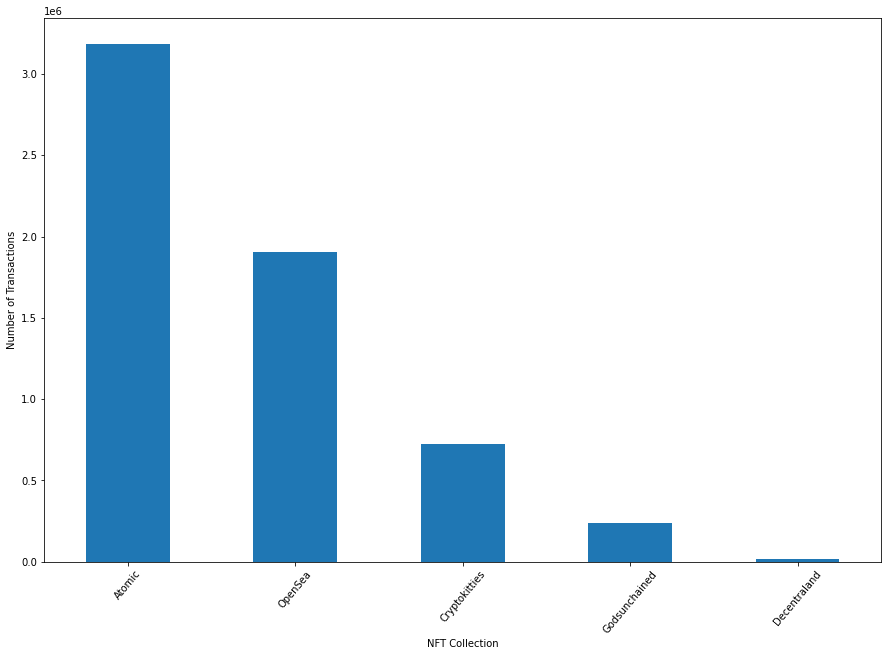

In [33]:
# Plot by sales.
fig = plt.figure(figsize=(15,10))
market.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("NFT Collection")
plt.ylabel("Number of Transactions")
plt.savefig('../figures/03-collection-sales.jpg', bbox_inches='tight', dpi=150)
plt.show()

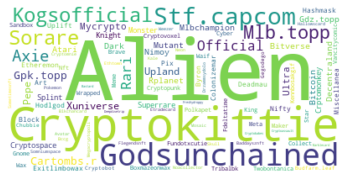

In [34]:
# Display frequency word cloud.
text = X['Collection_cleaned'].value_counts().to_dict()
wc = WordCloud(max_font_size=100, max_words=100, background_color="white").generate_from_frequencies(text)

# Save file.
wc.to_file("../figures/03-collection-cloud.png")

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Crypto

In [35]:
# Groupby
crypto = X.groupby("Crypto")

# Summary statistics
crypto.describe().head()

Price_Crypto                                                           \
              count         mean          std    min     25%     50%     75%   
Crypto                                                                         
0xBTC         175.0    18.791245    39.339234   0.01    5.00    10.0    15.5   
1MT            33.0    93.348556    91.823929   1.00   40.00    45.0   120.0   
2XDN            4.0   275.000000   184.842275  50.00  200.00   275.0   350.0   
ABST          283.0  1191.360777  1201.190253   0.10  400.00  1000.0  1000.0   
AMPL            4.0     2.750000     0.500000   2.00    2.75     3.0     3.0   

               Price_USD                                                 \
           max     count      mean       std     min       25%      50%   
Crypto                                                                    
0xBTC    420.0       0.0       NaN       NaN     NaN       NaN      NaN   
1MT      375.0       0.0       NaN       NaN     NaN       NaN      NaN   
2XDN     500.0       0.0       NaN       NaN     NaN       NaN      NaN   
ABST    9000.0       0.0       NaN       NaN     NaN       NaN      NaN   
AMPL       3.0       4.0  1.973525  1.128538  1.0913  1.425838  1.58715   

                          
             75%     max  
Crypto                    
0xBTC        NaN     NaN  
1MT          NaN     NaN  
2XDN         NaN     NaN  
ABST         NaN     NaN  
AMPL    2.134837  3.6285

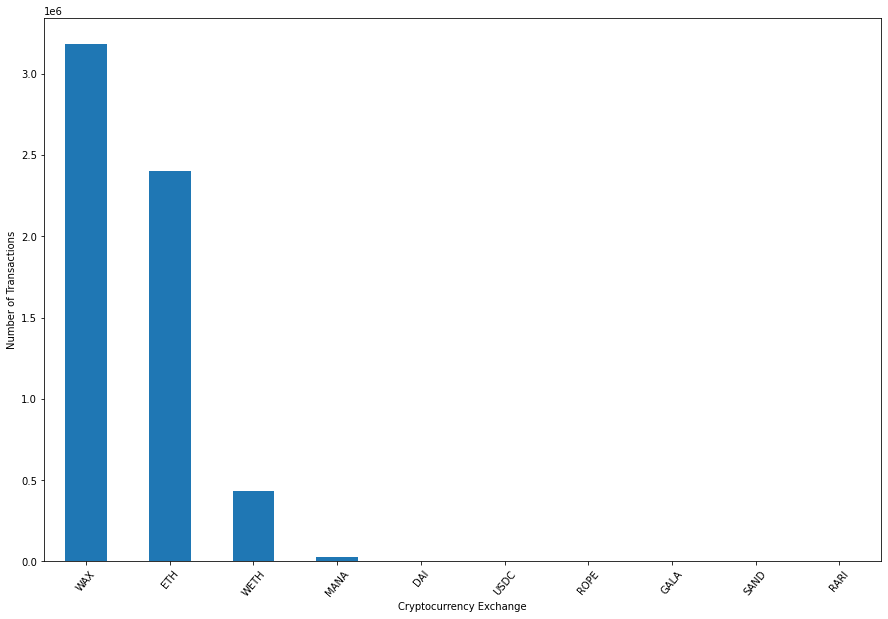

In [36]:
# Plot by sales.
fig = plt.figure(figsize=(15,10))
crypto.size().sort_values(ascending=False).head(n=10).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Cryptocurrency Exchange")
plt.ylabel("Number of Transactions")
plt.savefig('../figures/04-crypto-sales.jpg', bbox_inches='tight', dpi=150)
plt.show()

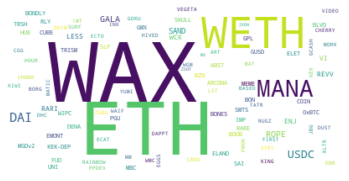

In [37]:
# Display frequency word cloud.
text = X['Crypto'].value_counts().to_dict()
wc = WordCloud(max_font_size=100, max_words=100, background_color="white").generate_from_frequencies(text)

# Save file.
wc.to_file("../figures/04-crypto-cloud.png")

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## NFT Names

In [38]:
X['Name'].describe()

count          1851964
unique         1219345
top       NFT Yourself
freq              5337
Name: Name, dtype: object

There are 59444576 words in the combination of all names from NFT sales.


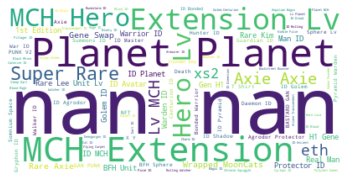

In [39]:
# Display frequency word cloud.
text = " ".join(str(name) for name in X['Name'])
print ("There are {} words in the combination of all names from NFT sales.".format(len(text)))
wc = WordCloud(max_font_size=150, max_words=100, background_color="white").generate(text)

# Save file.
wc.to_file("../figures/05-name-cloud.png")

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## NFT Descriptions

In [40]:
X['Description'].describe()

count                                               1730729
unique                                               489235
top       Rare Player Cards are only issued at 100 editi...
freq                                                 275588
Name: Description, dtype: object

## Unique ID Collection

In [41]:
X['Unique_id_collection'].describe()

count                                6071027
unique                               4678242
top       ('Kings-of-leon-yellowheart', '0')
freq                                    5420
Name: Unique_id_collection, dtype: object

In [42]:
X.sort_values(by="Unique_id_collection")

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
5445927,0x4d3f1e20711694c975af89326dee177148f19876,16,0xba017344dca1474d1abfd9dcc10f2cdc8666324b561f...,0x0031a2d5ea5b69bcb8e191f5f0ae7919e9c9f0db,EthereumDomains,0xadd18b6c8a77cb7a119bfb2d70a29b89bb8ba1a5,DigitalArt,https://lh3.googleusercontent.com/m2xDPqqjbNrs...,NaN,https://lh3.googleusercontent.com/m2xDPqqjbNrs...,...,o.0,NaN,0-domains,OpenSea,2020-11-06 00:00:00,2020-11-06 05:42:28,https://opensea.io/assets/0x4d3f1e20711694c975...,"('0-domains', '16')",Domain,Other
5105530,0x4d3f1e20711694c975af89326dee177148f19876,2,0x78cec95dc409293f22e179c18bb8470fb8c1931e314b...,0x0031a2d5ea5b69bcb8e191f5f0ae7919e9c9f0db,EthereumDomains,0x122b0eaa0a4252cefcb877f0bf608bae2cf7ca9e,Wilson83,https://lh3.googleusercontent.com/m2xDPqqjbNrs...,NaN,https://lh3.googleusercontent.com/m2xDPqqjbNrs...,...,b.0,NaN,0-domains,OpenSea,2020-04-09 00:00:00,2020-04-09 09:35:34,https://opensea.io/assets/0x4d3f1e20711694c975...,"('0-domains', '2')",Domain,Other
5469259,0xab173f5dff2966d83289f047cf4840e15f9d8992,24,0xfbc075dc51b55b8a0ec67fd537cba37136aaa55a93d3...,0x9327775e225a703125167eb423d246915bdc37e7,Starry,0x3e86eac93a2dbb4faeb8709d77d451aeda710ef9,Mercy66,https://lh3.googleusercontent.com/yJBf5K02dMyT...,NaN,https://lh3.googleusercontent.com/yJBf5K02dMyT...,...,0x meets imToken #24,NaN,0x-meets-imtoken,OpenSea,2020-12-26 00:00:00,2020-12-26 07:47:28,https://opensea.io/assets/0xab173f5dff2966d832...,"('0x-meets-imtoken', '24')",Xmeetsimtoken,Other
5424072,0x001ba7dc2ddfa893c17b6b478c9853b83fc8594c,1,0xc17eae8a03d4495521fe1e13c0dfc0520feb43ab6488...,0x5e9cb317d6ca6de25797a1cccca87849571d7cd4,NaN,0x2fec5d8835b39f314187dc1da933b273f32f18c3,theblackfractal,https://lh3.googleusercontent.com/pr_1auWg_BuG...,https://ipfs.io/ipfs/QmebtnmaUuU1vpV4uT9erVY5f...,https://lh3.googleusercontent.com/pr_1auWg_BuG...,...,TEXHN GLITCH 1,ネオンの伝説\nTEXHN GLITCH 1,0x001ba7dc2ddfa893c17b6b478c9853b83fc8594c,OpenSea,2020-11-13 00:00:00,2020-11-13 19:44:51,https://opensea.io/assets/0x001ba7dc2ddfa893c1...,"('0x001ba7dc2ddfa893c17b6b478c9853b83fc8594c',...",Xbadcddfacbbcbfcc,Other
5513935,0x001ba7dc2ddfa893c17b6b478c9853b83fc8594c,6,0x573401db22e279e1554126d9e746a7ed8d7c208cd578...,0x5e9cb317d6ca6de25797a1cccca87849571d7cd4,NaN,0x3a2da971984d61759a8a8518e85b9f7feb5d013b,NaN,https://lh3.googleusercontent.com/cHompyLpfvFs...,https://ipfs.io/ipfs/QmQv2kVfDjpKnsKE29yMThNXD...,https://lh3.googleusercontent.com/cHompyLpfvFs...,...,攻殻機動隊 KUSANAGI,攻殻機動隊 KUSANAGI,0x001ba7dc2ddfa893c17b6b478c9853b83fc8594c,OpenSea,2020-12-06 00:00:00,2020-12-06 10:19:44,https://opensea.io/assets/0x001ba7dc2ddfa893c1...,"('0x001ba7dc2ddfa893c17b6b478c9853b83fc8594c',...",Xbadcddfacbbcbfcc,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046889,atomicassets,1099521575043,NaN,xgyaw.wam,NaN,ynnra.wam,NaN,QmV5vWVi7EFiNrb63WF52BJPm6f3J3pwS7AXrFxTSJYzsr,https://ipfs.io/ipfs/QmV5vWVi7EFiNrb63WF52BJPm...,https://ipfs.atomichub.io/ipfs/QmV5vWVi7EFiNrb...,...,NaN,NaN,zombieartist,Atomic,2021-04-02 00:00:00,2021-04-02 03:53:36,NaN,"('zombieartist', '1099521575043')",Zombie,Other
3288493,atomicassets,1099521133207,NaN,j5pr2.wam,NaN,czdqw.wam,NaN,QmNgQTP39KHA9HRobUaM5iivujifeTeDJGiD4MPcu2J68D,https://ipfs.io/ipfs/QmNgQTP39KHA9HRobUaM5iivu...,https://ipfs.atomichub.io/ipfs/QmNgQTP39KHA9HR...,...,NaN,NaN,zombiesperks,Atomic,2021-04-11 00:00:00,2021-04-11 20:01:22,NaN,"('zombiesperks', '1099521133207')",Zombie,Other
3288105,atomicassets,1099523337339,NaN,fuqr4.wam,NaN,f11ay.wam,NaN,QmasKbQ2tKugnTdkGrGzJNhRSBL31KzW26BBnwtwWsyojk,https://ipfs.io/ipfs/QmasKbQ2tKugnTdkGrGzJNhRS...,https://ipfs.atomichub.io/ipfs/QmasKbQ2tKugnTd...,...,NaN,NaN,zombiesperks,Atomic,2021-04-11 00:00:00,2021-04-11 20:08:47

In [43]:
for col in cols:
    print(X.loc[5435445, col])

0x9f9c171afde4cc6bbf6d38ae4012c83633653b85
8278
0x01e82015814ef3529f9c4ba02d56baa01bf1c6390571bee9548a62b6e4c3c2dd
0xdf3ed758ace2b4d7ee520104ff2cbf36bdd0b751
dev
0x916d82e095ff6ba820d1daef029420c4007b0c08
Yuanzi
https://lh3.googleusercontent.com/H49Hj3mDG7eCd2PbFFYXrkun3-zzaSGnKqpI5Dc-QrwDCH25uv9WuDAMbiLVFkqsLm0hm9wZT03ZmWHA97H4ahTY
https://assets.cargo.build/b05f8083ca4d68f423fd61515cd9a803.png
https://lh3.googleusercontent.com/H49Hj3mDG7eCd2PbFFYXrkun3-zzaSGnKqpI5Dc-QrwDCH25uv9WuDAMbiLVFkqsLm0hm9wZT03ZmWHA97H4ahTY=s250
https://lh3.googleusercontent.com/H49Hj3mDG7eCd2PbFFYXrkun3-zzaSGnKqpI5Dc-QrwDCH25uv9WuDAMbiLVFkqsLm0hm9wZT03ZmWHA97H4ahTY=s128
0.97
ETH
433.83735
Polyient Games Founder's Key
Official Membership and Rewards NFT for the Polyient Games Ecosystem
Pgfks
OpenSea
2020-11-10 00:00:00
2020-11-10 05:22:43
https://opensea.io/assets/0x9f9c171afde4cc6bbf6d38ae4012c83633653b85/8278
('Pgfks', '8278')
Pgfk
Utility


In [44]:
X.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games


In [45]:
import missingno as msno

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071027 entries, 0 to 6071026
Data columns (total 24 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Smart_contract            object 
 1   ID_token                  object 
 2   Transaction_hash          object 
 3   Seller_address            object 
 4   Seller_username           object 
 5   Buyer_address             object 
 6   Buyer_username            object 
 7   Image_url_1               object 
 8   Image_url_2               object 
 9   Image_url_3               object 
 10  Image_url_4               object 
 11  Price_Crypto              float64
 12  Crypto                    object 
 13  Price_USD                 float64
 14  Name                      object 
 15  Description               object 
 16  Collection                object 
 17  Market                    object 
 18  Datetime_updated          object 
 19  Datetime_updated_seconds  object 
 20  Permanent_link          

## Missingness

In [47]:
X.isna().sum()

Smart_contract               961610
ID_token                          0
Transaction_hash            3185640
Seller_address                    0
Seller_username             4977773
Buyer_address                     0
Buyer_username              5178164
Image_url_1                   54798
Image_url_2                 1122022
Image_url_3                 1032330
Image_url_4                 1036942
Price_Crypto                      0
Crypto                            0
Price_USD                      8283
Name                        4219063
Description                 4340298
Collection                        0
Market                            0
Datetime_updated                  0
Datetime_updated_seconds          0
Permanent_link              4163765
Unique_id_collection              0
Collection_cleaned                0
Category                          0
dtype: int64

In [50]:
missingperc = (X.isna().sum() / X.shape[0])

In [51]:
missingperc

Smart_contract              0.158393
ID_token                    0.000000
Transaction_hash            0.524728
Seller_address              0.000000
Seller_username             0.819923
Buyer_address               0.000000
Buyer_username              0.852930
Image_url_1                 0.009026
Image_url_2                 0.184816
Image_url_3                 0.170042
Image_url_4                 0.170802
Price_Crypto                0.000000
Crypto                      0.000000
Price_USD                   0.001364
Name                        0.694950
Description                 0.714920
Collection                  0.000000
Market                      0.000000
Datetime_updated            0.000000
Datetime_updated_seconds    0.000000
Permanent_link              0.685842
Unique_id_collection        0.000000
Collection_cleaned          0.000000
Category                    0.000000
dtype: float64

<AxesSubplot:>

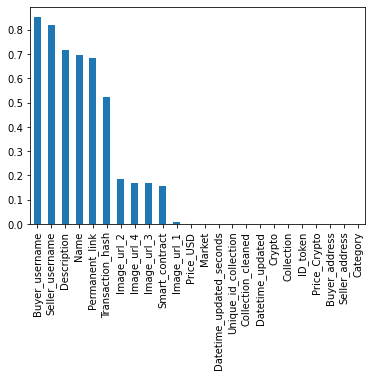

In [52]:
ax = missingperc.sort_values(ascending=False).plot.bar()
ax.figure.savefig('../figures/07-missing-perc.jpg', bbox_inches="tight", dpi=300)
ax

<AxesSubplot:>

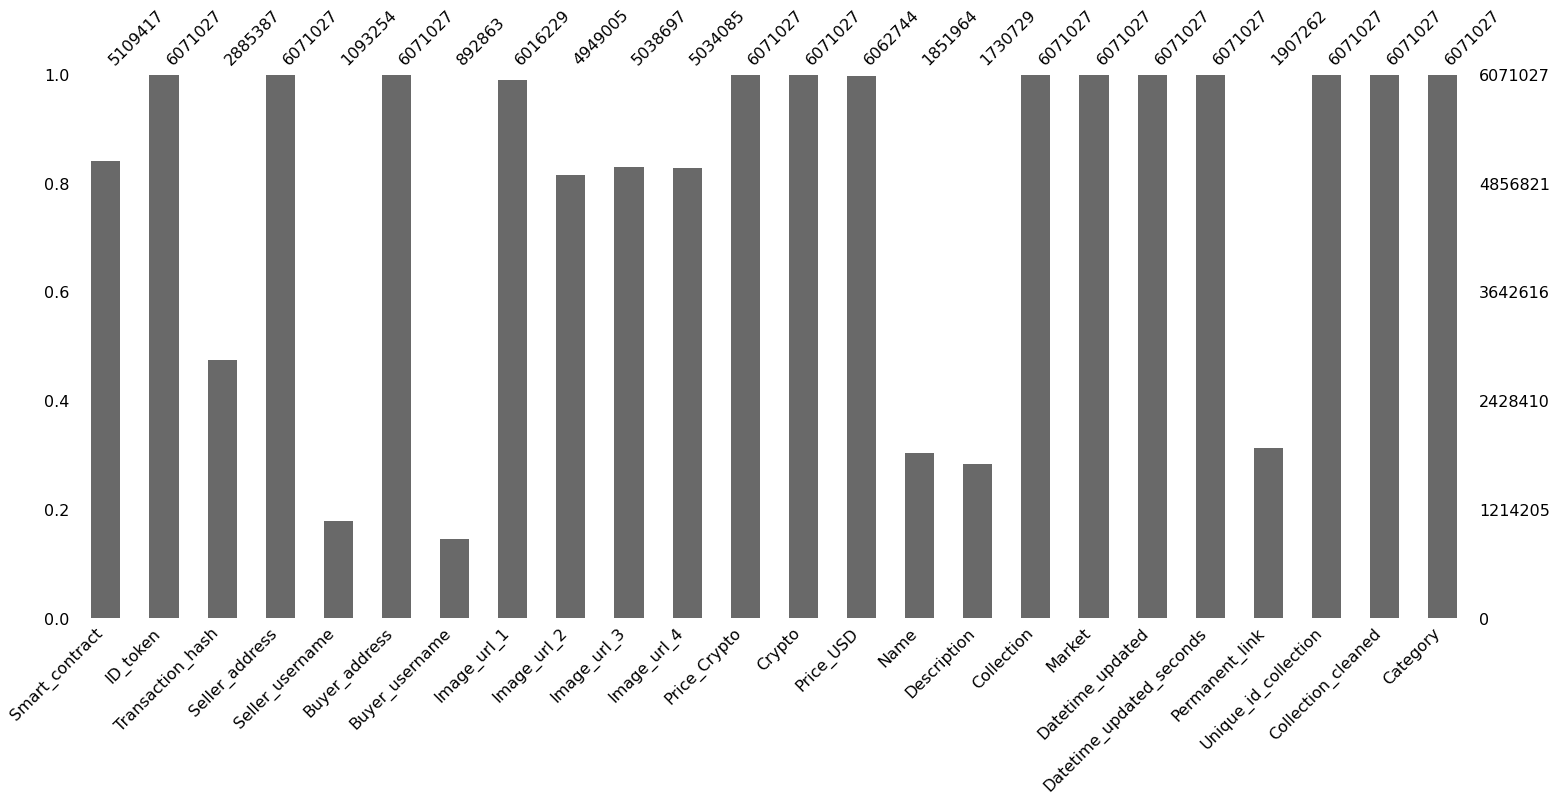

In [48]:
ax = msno.bar(X)
ax.figure.savefig('../figures/07-missing-bar.jpg', bbox_inches='tight', dpi=300)
ax

In [55]:
X['Price_USD'].mean()

146.3413005469002

In [56]:
X['Price_USD'].median()

1.42647